### XG
#### REGULATOR

In [47]:
%store -r xgb_data_risk
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming xgb_data_risk is your DataFrame and contains the features, target variable 'target', and the column 'REJECTED'

# Separate the DataFrame into features and target
X = xgb_data_risk.drop('TARGET', axis=1)
y = xgb_data_risk['TARGET']



# Select only the observations where 'REJECTED' equals 1 for training
X_train = X[X['REJECTED'] == 1]
y_train = y[X['REJECTED'] == 1]

# Preparing the full dataset for testing
X_test = X.copy()
y_test = y.copy()

# Convert the training and testing sets into DMatrix, which is an internal data structure that XGBoost uses for optimized performance and efficiency
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',  # Using RMSE (root mean squared error) as the evaluation metric
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train')])

# Make predictions on the testing set
y_pred_xg_reg = bst.predict(dtest)

# Calculate MSE on the testing set
mse = mean_squared_error(y_test, y_pred_xg_reg)
print(f"Mean Squared Error on the testing set: {mse}")

[0]	train-rmse:0.21825
[1]	train-rmse:0.16000
[2]	train-rmse:0.12124
[3]	train-rmse:0.09639
[4]	train-rmse:0.08122
[5]	train-rmse:0.07201
[6]	train-rmse:0.06675
[7]	train-rmse:0.06366
[8]	train-rmse:0.06171
[9]	train-rmse:0.06054
[10]	train-rmse:0.05950
[11]	train-rmse:0.05869
[12]	train-rmse:0.05807
[13]	train-rmse:0.05752
[14]	train-rmse:0.05709
[15]	train-rmse:0.05668
[16]	train-rmse:0.05641
[17]	train-rmse:0.05628
[18]	train-rmse:0.05622
[19]	train-rmse:0.05604
[20]	train-rmse:0.05574
[21]	train-rmse:0.05556
[22]	train-rmse:0.05524
[23]	train-rmse:0.05499
[24]	train-rmse:0.05488
[25]	train-rmse:0.05452
[26]	train-rmse:0.05433
[27]	train-rmse:0.05402
[28]	train-rmse:0.05369
[29]	train-rmse:0.05356
[30]	train-rmse:0.05321
[31]	train-rmse:0.05297
[32]	train-rmse:0.05280
[33]	train-rmse:0.05242
[34]	train-rmse:0.05213
[35]	train-rmse:0.05198
[36]	train-rmse:0.05170
[37]	train-rmse:0.05128
[38]	train-rmse:0.05109
[39]	train-rmse:0.05063
[40]	train-rmse:0.05051
[41]	train-rmse:0.05015
[4

/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [48]:
xgb_data_risk['y_pred']=y_pred_xg_reg
#print(X_test.shape)
#mse_pd = mean_squared_error(xgb_data_risk['TARGET'], xgb_data_risk['y_pred'])
xgb_data_risk_bad = xgb_data_risk[xgb_data_risk['REJECTED'] == 1]
mse_reg_bad=[]
mse_reg_good=[]
mse_reg_bad.append(mean_squared_error(xgb_data_risk_bad['TARGET'], xgb_data_risk_bad['y_pred']))
xgb_data_risk_good = xgb_data_risk[xgb_data_risk['REJECTED'] == 0]
mse_reg_good.append(mean_squared_error(xgb_data_risk_good['TARGET'], xgb_data_risk_good['y_pred']))
print(mse_reg_good)
print(mse_reg_bad)

[0.04413655788170054]
[0.0014424796609519262]


/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is dep

#### Lender


In [49]:
%store -r xgb_data_risk
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming xgb_data_risk is your DataFrame and contains the features, target variable 'target', and the column 'REJECTED'

# Separate the DataFrame into features and target
X = xgb_data_risk.drop('TARGET', axis=1)
y = xgb_data_risk['TARGET']



# Select only the observations where 'REJECTED' equals 1 for training
X_train=X
X_train['weights'] = X['REJECTED'].replace({0: 0.8, 1: 0.2})
y_train=y

#print(X_train)
X_train.drop('REJECTED', axis=1)

# Preparing the full dataset for testing
X_test = X.copy()
y_test = y.copy()

# Convert the training and testing sets into DMatrix, which is an internal data structure that XGBoost uses for optimized performance and efficiency
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',  # Using RMSE (root mean squared error) as the evaluation metric
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train')])

# Make predictions on the testing set
y_pred_xg_len = bst.predict(dtest)

# Calculate MSE on the testing set
mse = mean_squared_error(y_test, y_pred_xg_len)
print(f"Mean Squared Error on the testing set: {mse}")

[0]	train-rmse:0.22302
[1]	train-rmse:0.19300
[2]	train-rmse:0.17608
[3]	train-rmse:0.16697
[4]	train-rmse:0.16209
[5]	train-rmse:0.15943
[6]	train-rmse:0.15786
[7]	train-rmse:0.15697
[8]	train-rmse:0.15626
[9]	train-rmse:0.15580
[10]	train-rmse:0.15537
[11]	train-rmse:0.15507
[12]	train-rmse:0.15483
[13]	train-rmse:0.15454
[14]	train-rmse:0.15429
[15]	train-rmse:0.15403
[16]	train-rmse:0.15381
[17]	train-rmse:0.15359
[18]	train-rmse:0.15342
[19]	train-rmse:0.15318
[20]	train-rmse:0.15306
[21]	train-rmse:0.15290
[22]	train-rmse:0.15275
[23]	train-rmse:0.15265
[24]	train-rmse:0.15246
[25]	train-rmse:0.15228
[26]	train-rmse:0.15214
[27]	train-rmse:0.15195
[28]	train-rmse:0.15184
[29]	train-rmse:0.15168
[30]	train-rmse:0.15155
[31]	train-rmse:0.15139
[32]	train-rmse:0.15124
[33]	train-rmse:0.15116
[34]	train-rmse:0.15098
[35]	train-rmse:0.15078
[36]	train-rmse:0.15068
[37]	train-rmse:0.15049
[38]	train-rmse:0.15026
[39]	train-rmse:0.15006
[40]	train-rmse:0.15000
[41]	train-rmse:0.14993
[4

/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [50]:
xgb_data_risk['y_pred_len']=y_pred_xg_len
#print(X_test.shape)
#mse_pd = mean_squared_error(xgb_data_risk['TARGET'], xgb_data_risk['y_pred'])
xgb_data_risk_bad = xgb_data_risk[xgb_data_risk['REJECTED'] == 1]

mse_reg_bad.append(mean_squared_error(xgb_data_risk_bad['TARGET'], xgb_data_risk_bad['y_pred_len']))
xgb_data_risk_good = xgb_data_risk[xgb_data_risk['REJECTED'] == 0]
mse_reg_good.append(mean_squared_error(xgb_data_risk_good['TARGET'], xgb_data_risk_good['y_pred_len']))
print(mse_reg_good)
print(mse_reg_bad)

/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is dep

[0.04413655788170054, 0.031229224001336132]
[0.0014424796609519262, 0.00030860178352808815]


/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is dep

### Linear Model

In [51]:
from sklearn.linear_model import LinearRegression
%store -r xgb_data_risk
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming xgb_data_risk is your DataFrame and contains the features, target variable 'target', and the column 'REJECTED'

# Separate the DataFrame into features and target
X = xgb_data_risk.drop('TARGET', axis=1)
y = xgb_data_risk['TARGET']



# Select only the observations where 'REJECTED' equals 1 for training
X_train = X[X['REJECTED'] == 1]
y_train = y[X['REJECTED'] == 1]

# Preparing the full dataset for testing
X_test = X.copy()
y_test = y.copy()

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

    # Make predictions on the test set
y_pred_linear_reg = model_linear.predict(X_test)

# Calculate MSE on the testing set
mse = mean_squared_error(y_test, y_pred_linear_reg)
print(f"Mean Squared Error on the testing set: {mse}")

/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/v

Mean Squared Error on the testing set: 0.020734820567699683


/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [52]:
xgb_data_risk['y_pred']=y_pred_linear_reg
#print(X_test.shape)
#mse_pd = mean_squared_error(xgb_data_risk['TARGET'], xgb_data_risk['y_pred'])
xgb_data_risk_bad = xgb_data_risk[xgb_data_risk['REJECTED'] == 1]
mse_reg_bad_lin=[]
mse_reg_good_lin=[]
mse_reg_bad_lin.append(mean_squared_error(xgb_data_risk_bad['TARGET'], xgb_data_risk_bad['y_pred']))
xgb_data_risk_good = xgb_data_risk[xgb_data_risk['REJECTED'] == 0]
mse_reg_good_lin.append(mean_squared_error(xgb_data_risk_good['TARGET'], xgb_data_risk_good['y_pred']))
print(mse_reg_bad_lin)
print(mse_reg_good_lin)

/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is dep

[0.00030289301438098364]
[0.031476944260619935]


/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is dep

In [53]:
%store -r xgb_data_risk
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Assuming xgb_data_risk is your DataFrame and contains the features, target variable 'target', and the column 'REJECTED'

# Separate the DataFrame into features and target
X = xgb_data_risk.drop('TARGET', axis=1)
y = xgb_data_risk['TARGET']



# Select only the observations where 'REJECTED' equals 1 for training
X_train=X
X_train['weights'] = X['REJECTED'].replace({0: 0.8, 1: 0.2})
y_train=y

#print(X_train)
X_train.drop('REJECTED', axis=1)

# Preparing the full dataset for testing
X_test = X.copy()
y_test = y.copy()

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

    # Make predictions on the test set
y_pred_linear_len = model_linear.predict(X_test)

# Calculate MSE on the testing set
mse = mean_squared_error(y_test, y_pred_linear_len)
print(f"Mean Squared Error on the testing set: {mse}")

/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/v

Mean Squared Error on the testing set: 0.02007324021318608


/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [54]:
xgb_data_risk['y_pred']=y_pred_linear_len
#print(X_test.shape)
#mse_pd = mean_squared_error(xgb_data_risk['TARGET'], xgb_data_risk['y_pred'])
xgb_data_risk_bad = xgb_data_risk[xgb_data_risk['REJECTED'] == 1]

mse_reg_bad_lin.append(mean_squared_error(xgb_data_risk_bad['TARGET'], xgb_data_risk_bad['y_pred']))
xgb_data_risk_good = xgb_data_risk[xgb_data_risk['REJECTED'] == 0]
mse_reg_good_lin.append(mean_squared_error(xgb_data_risk_good['TARGET'], xgb_data_risk_good['y_pred']))
print(mse_reg_bad_lin)
print(mse_reg_good_lin)

/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is dep

[0.00030289301438098364, 0.00048748565320139246]
[0.031476944260619935, 0.030370486890157537]


/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/radimbadr/miniconda3/envs/unboxing_black_box/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is dep

[0.0014424796609519262, 0.00030860178352808815]
[0.04413655788170054, 0.031229224001336132]
[0.00030289301438098364, 0.00048748565320139246]
[0.031476944260619935, 0.030370486890157537]


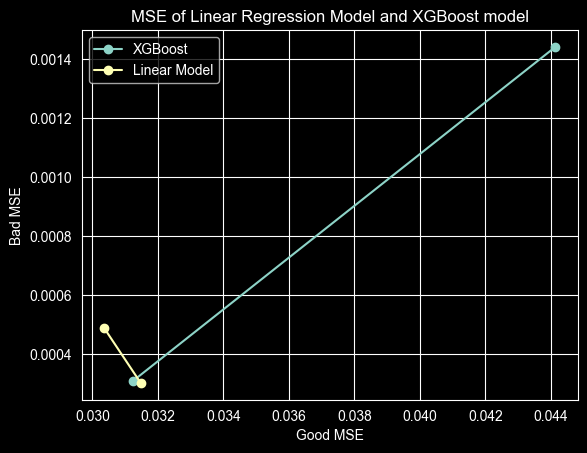

In [70]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Plot the MSE values for different l values
print(mse_reg_bad)
print(mse_reg_good)

print(mse_reg_bad_lin)
print(mse_reg_good_lin)
plt.plot(mse_reg_good, mse_reg_bad, marker='o', label="XGBoost")
anno_lin=["Regulator", "Lender"]
#for i, txt in enumerate(anno_lin):
 #   plt.annotate(txt, (l_values_linear[i], mse_reg_values_linear[i]), textcoords="offset points", xytext=(0,10), ha='center')
#for i, txt in enumerate(anno_lin):
#    plt.annotate(txt, (l_values[i], mse_reg_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

#convex



plt.plot(mse_reg_good_lin, mse_reg_bad_lin, marker='o', label="Linear Model")
#plt.ylim(max(mse_reg_good_lin), min(mse_reg_bad_lin))
#plt.xlim(max(mse_reg_good_lin), min(mse_reg_bad_lin))
plt.ylabel('Bad MSE')
plt.xlabel('Good MSE')
plt.title('MSE of Linear Regression Model and XGBoost model')
plt.legend()
plt.savefig("RISK-7", bbox_inches="tight",
            pad_inches=0.3, transparent=True, dpi=300)
plt.show()